<a href="https://colab.research.google.com/github/Divyanshu9382/Machine-Learning/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd

df=pd.read_csv('/content/bank_note_data.csv')

def gradient_descent(gradient, starting_point, learning_rate, num_iterations):


  theta = starting_point
  for _ in range(num_iterations):

    grad = gradient(theta)


    theta = learning_rate * grad

  return theta


def cost_function(theta, X, y):



  m = len(y)
  predictions = X.dot(theta)
  errors = predictions - y
  return (1 / (2 * m)) * np.sum(errors ** 2)

def gradient(theta, X, y):



  m = len(y)
  predictions = X.dot(theta)
  errors = predictions - y
  return (1 / m) * X.T.dot(errors)


X = np.array([[1, 1], [2, 1], [3, 1], [4, 1]])
y = np.array([2, 4, 5, 4])


theta0 = np.array([0, 0])
learning_rate = 0.01


theta = gradient_descent(lambda theta: gradient(theta, X, y), theta0, learning_rate, 1000)

print("Minimum found at:", theta)


Minimum found at: [-0.11191094 -0.04070482]


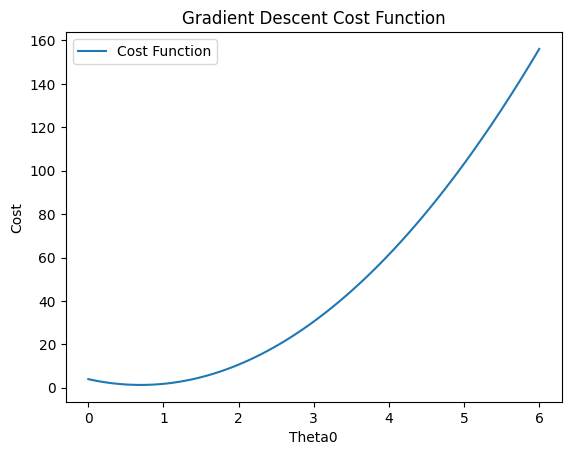

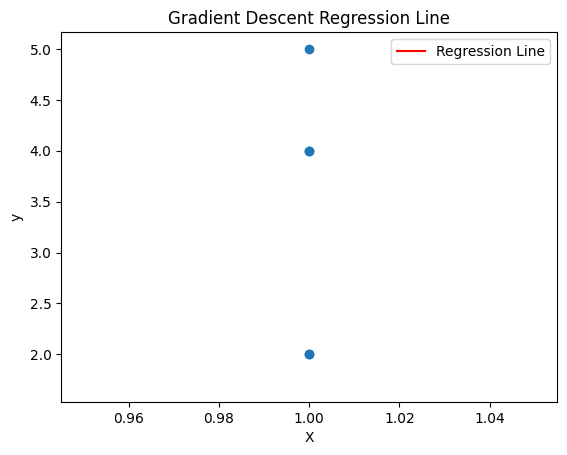

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('/content/bank_note_data.csv')

def gradient_descent(X, y, theta0, theta1, learning_rate, num_iterations):
  """
  Performs gradient descent to find the minimum of the cost function for linear regression.

  Args:
    X: A matrix of features.
    y: A vector of target values.
    theta0: Initial guess for intercept.
    theta1: Initial guess for slope.
    learning_rate: The step size for updating the parameters.
    num_iterations: The number of iterations to perform.

  Returns:
    theta0: Updated intercept after gradient descent.
    theta1: Updated slope after gradient descent.
    cost_history: A list of cost values at each iteration.
  """

  m = len(y)
  cost_history = []

  for _ in range(num_iterations):
    predictions = X.dot(np.array([theta0, theta1]))
    errors = predictions - y
    theta0 -= learning_rate * (1 / m) * np.sum(errors)
    theta1 -= learning_rate * (1 / m) * np.sum(errors * X[:, 1])
    cost_history.append(cost_function(X, y, theta0, theta1))

  return theta0, theta1, cost_history

def cost_function(X, y, theta0, theta1):
  """
  Calculates the mean squared error for a linear regression model.

  Args:
    X: A matrix of features.
    y: A vector of target values.
    theta0: Intercept.
    theta1: Slope.

  Returns:
    The mean squared error.
  """

  m = len(y)
  predictions = X.dot(np.array([theta0, theta1]))
  errors = predictions - y
  return (1 / (2 * m)) * np.sum(errors ** 2)

# Sample data
X = np.array([[1, 1], [2, 1], [3, 1], [4, 1],[5,1]])
y = np.array([2, 4, 5, 4, 2])

# Initial guess and learning rate
theta0 = 0
theta1 = 0
learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent
theta0, theta1, cost_history = gradient_descent(X, y, theta0, theta1, learning_rate, num_iterations)

# Generate data for plotting the cost function
x = np.linspace(0, 6, 100)
cost_values = []
for i in x:
  cost_values.append(cost_function(X, y, i, theta1))

# Plot the cost function
plt.plot(x, cost_values, label="Cost Function")
plt.xlabel("Theta0")
plt.ylabel("Cost")
plt.title("Gradient Descent Cost Function")
plt.legend()
plt.show()

# Plot the regression line
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], theta0 + theta1 * X[:, 1], color='red', label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Gradient Descent Regression Line")
plt.legend()
plt.show()



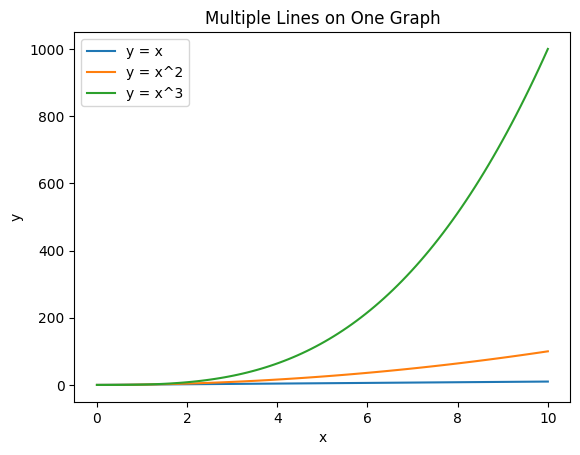

In [ ]:
# prompt: one graph of multiple lines

import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/content/bank_note_data.csv')

# Generate data for multiple lines
x = np.linspace(0, 10, 100)
y1 = x
y2 = x**2
y3 = x**3

# Create the plot
fig, ax = plt.subplots()

# Plot the lines
ax.plot(x, y1, label="y = x")
ax.plot(x, y2, label="y = x^2")
ax.plot(x, y3, label="y = x^3")

# Add labels and title
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Multiple Lines on One Graph")

# Add legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
# prompt: MSE
df=pd.read_csv('/content/bank_note_data.csv')

from sklearn.metrics import mean_squared_error

y_pred = X.dot(theta)
mse = mean_squared_error(y, y_pred)
print("Mean squared error:", mse)


Mean squared error: 15.726529405046819


In [ ]:
# prompt: PSNR

import numpy as np
df=pd.read_csv('/content/bank_note_data.csv')

def PSNR(original, compressed):


  mse = np.mean((original - compressed) ** 2)
  if mse == 0:
    return float('inf')
  return 10 * np.log10(255 ** 2 / mse)

# Example usage
original_image = np.random.randint(low=0, high=256, size=(100, 100, 3), dtype=np.uint8)
compressed_image = np.random.randint(low=0, high=256, size=(100, 100, 3), dtype=np.uint8)

psnr = PSNR(original_image, compressed_image)
print("PSNR:", psnr)



PSNR: 27.90367502450578


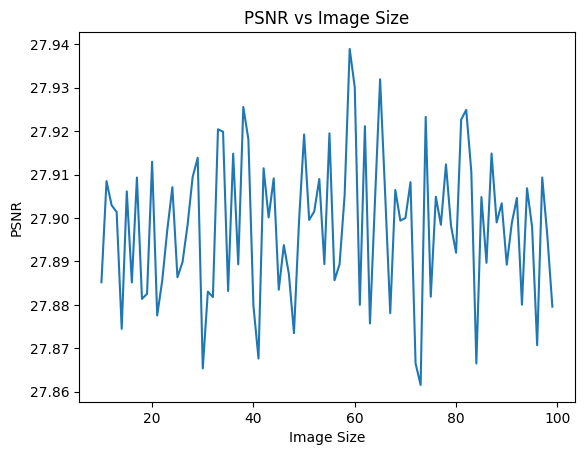

In [ ]:
# prompt: graph for PSNR

import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/content/bank_note_data.csv')

# Generate data
x = range(10, 100)
y = []
for i in x:
  original_image = np.random.randint(low=0, high=256, size=(100, 100, 3), dtype=np.uint8)
  compressed_image = np.random.randint(low=0, high=256, size=(100, 100, 3), dtype=np.uint8)
  psnr = PSNR(original_image, compressed_image)
  y.append(psnr)

# Create plot
plt.plot(x, y)
plt.xlabel("Image Size")
plt.ylabel("PSNR")
plt.title("PSNR vs Image Size")
plt.show()
